# Лабораторная работа №4 "Задача восстановления зависимостей. Линейная регрессия. Бустинг."  

## `Цены на недвижимость в Бостоне`

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings

# Наименования столбцов
1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million)
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to ﬁve Boston employment centers
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per 10,000 dollars
11. PTRATIO: pupil-teacher ratio by town 12. B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13.
12. LSTAT: % lower status of the population
13. MEDV: Median value of owner-occupied homes in \$1000s

# `Первый пункт`

In [2]:
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']

In [3]:
data = pd.read_csv('housing.csv', delim_whitespace=True, names=columns)

In [4]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [5]:
data.notnull().sum(), data.duplicated().sum()

(CRIM       506
 ZN         506
 INDUS      506
 CHAS       506
 NOX        506
 RM         506
 AGE        506
 DIS        506
 RAD        506
 TAX        506
 PTRATIO    506
 B          506
 LSTAT      506
 MEDV       506
 dtype: int64,
 0)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
cat_columns = ['CHAS', 'RAD']
qual_columns = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO',
'B', 'LSTAT']

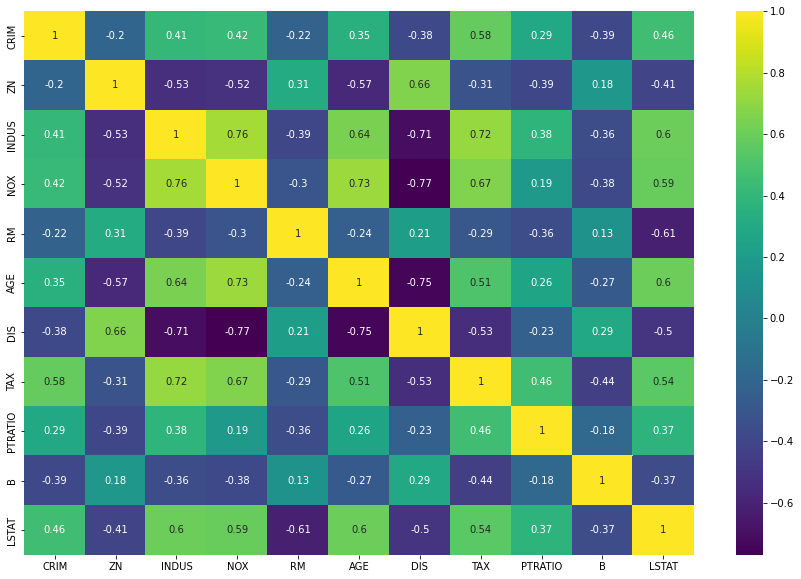

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(data=data[qual_columns].corr(), annot=True, cmap='viridis')
plt.show()

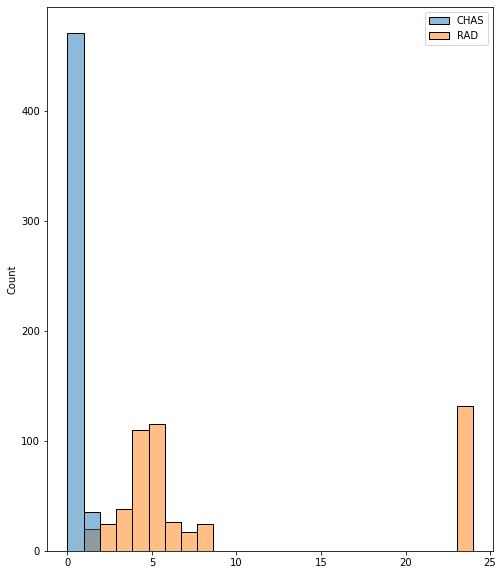

In [9]:
plt.figure(figsize=(8,10))
sns.histplot(data[cat_columns])
plt.show()

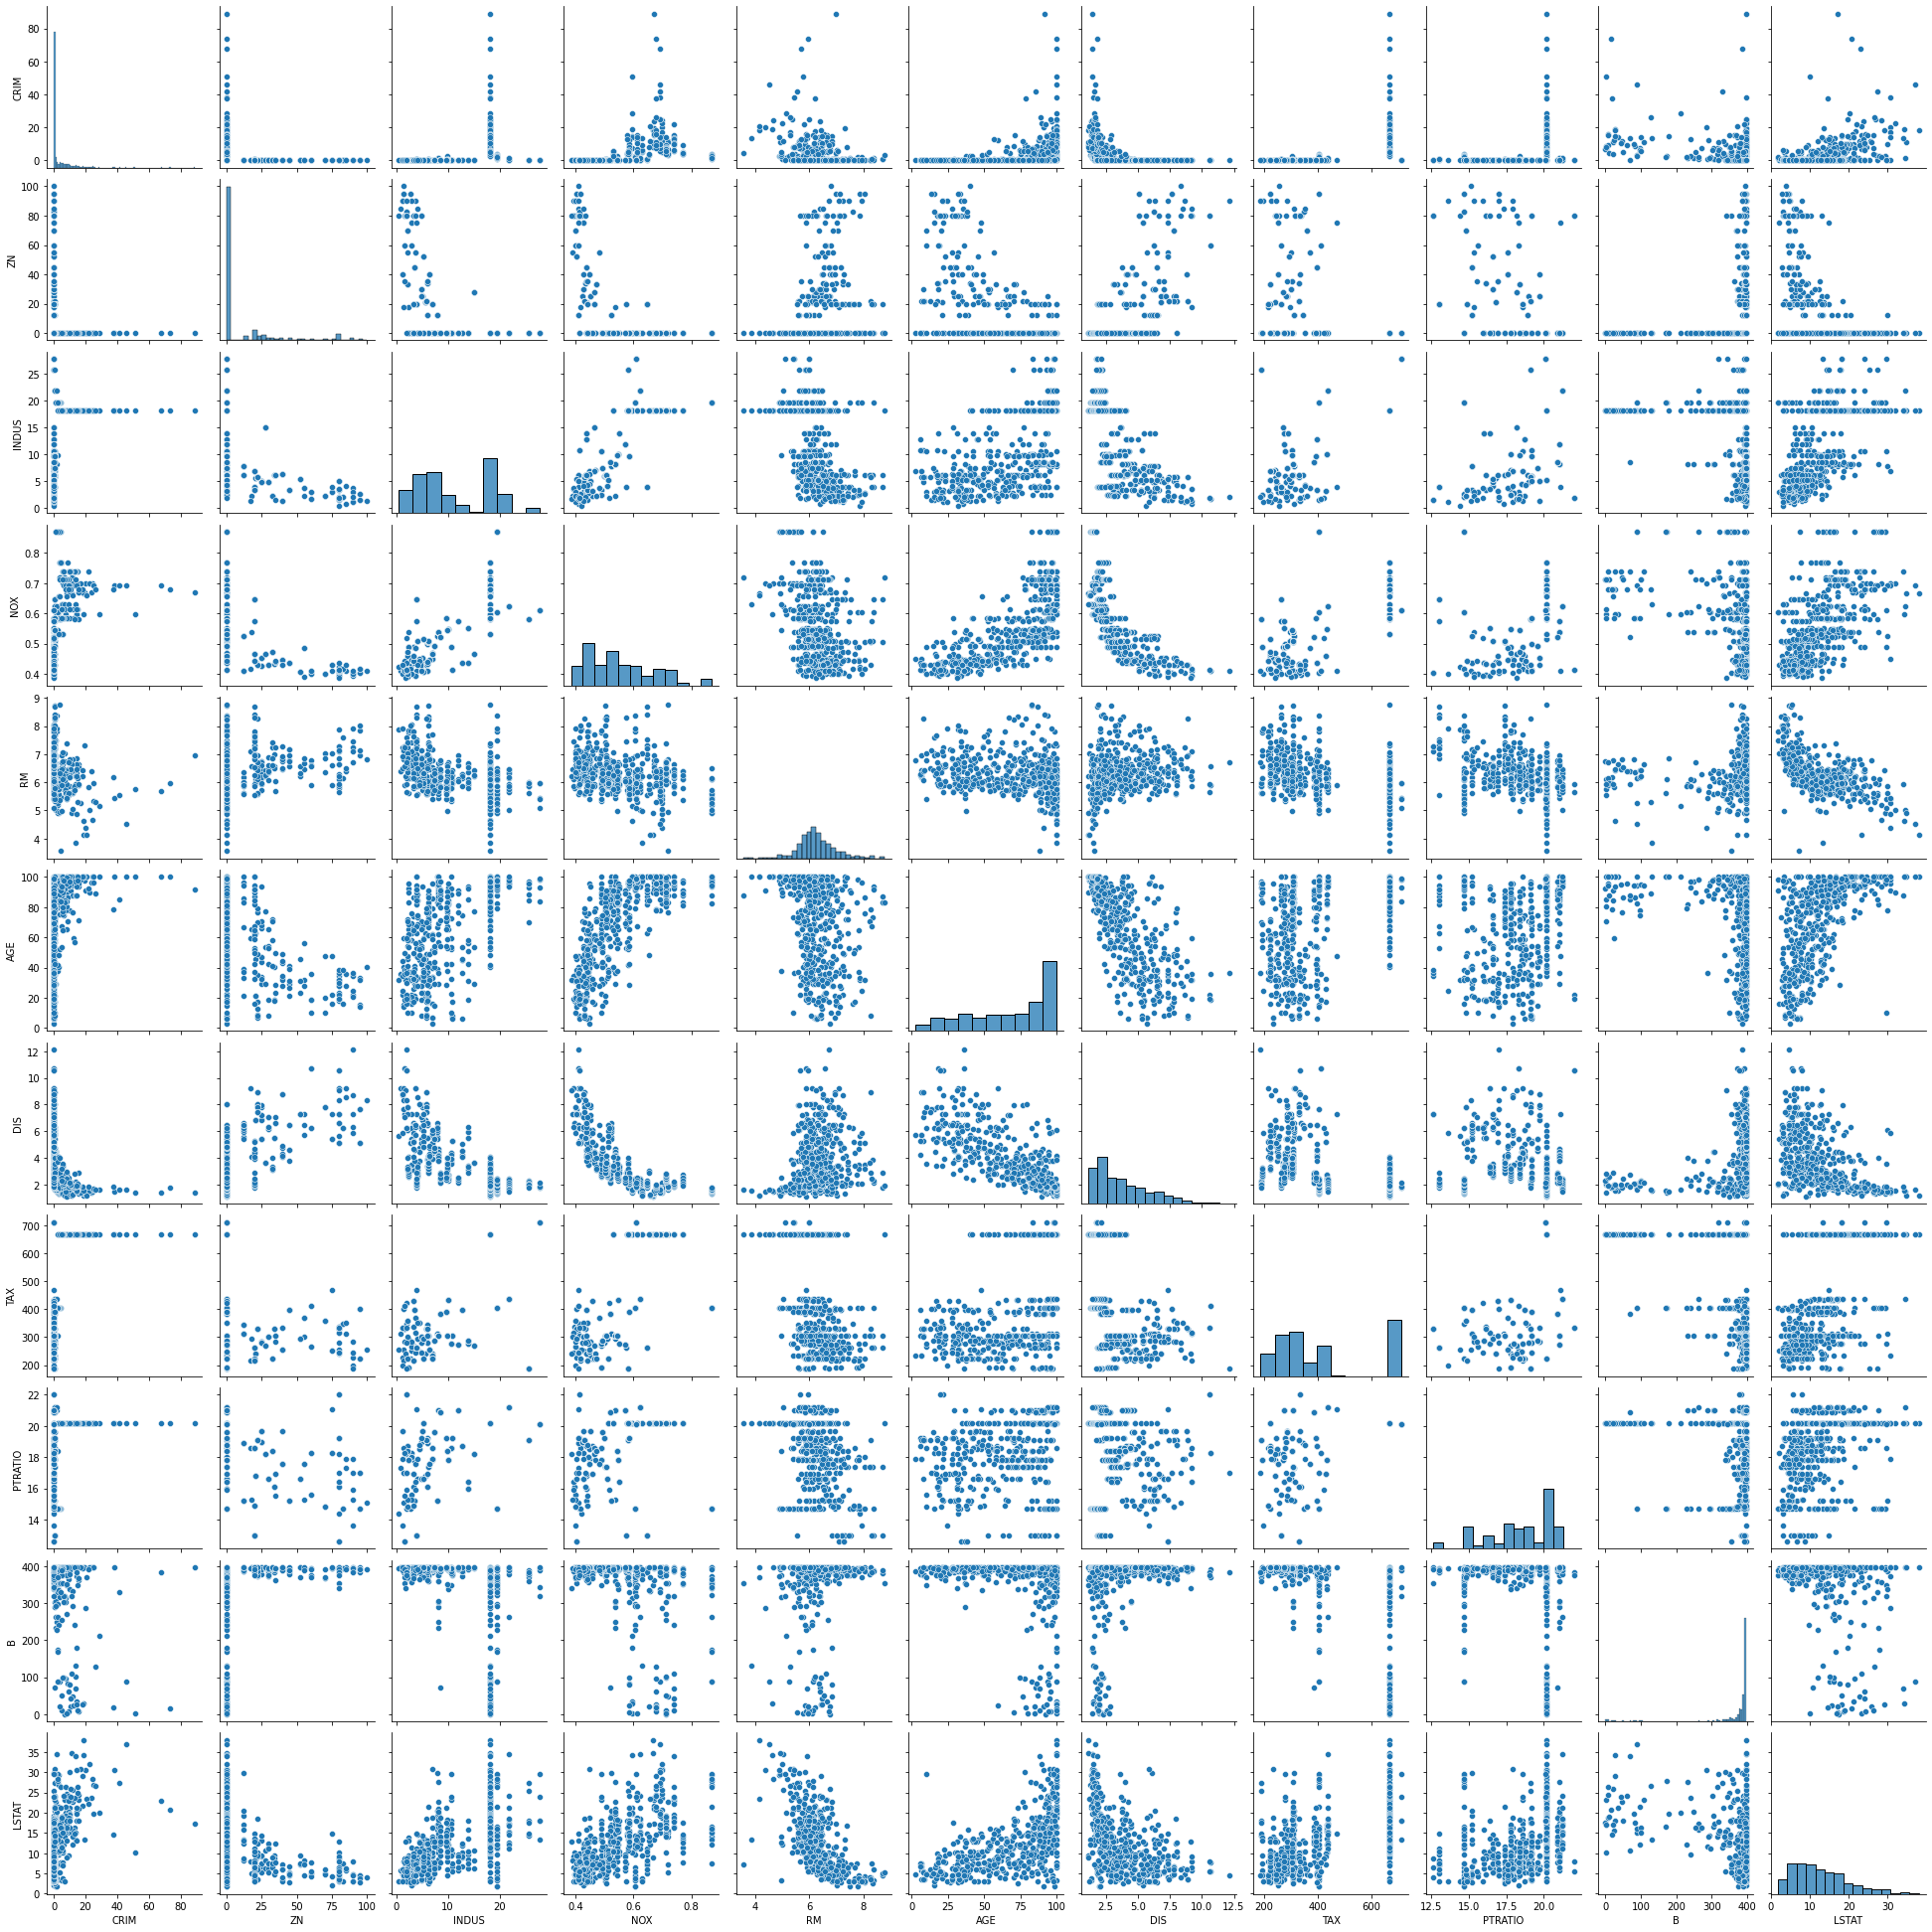

In [10]:
sns.pairplot(data[qual_columns]);

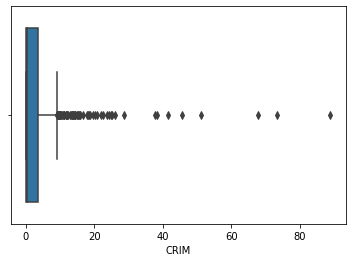

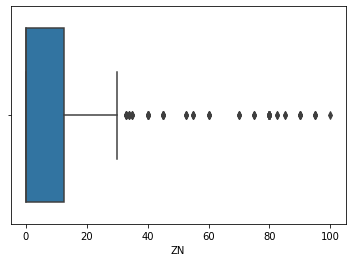

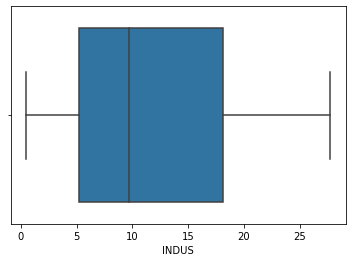

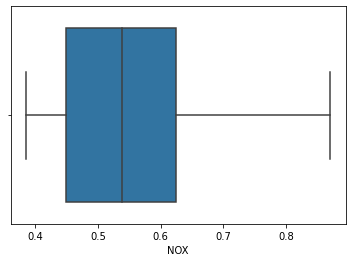

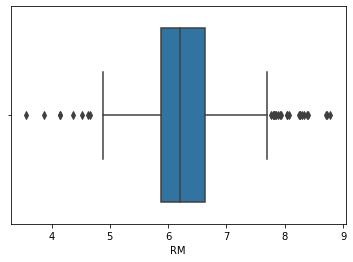

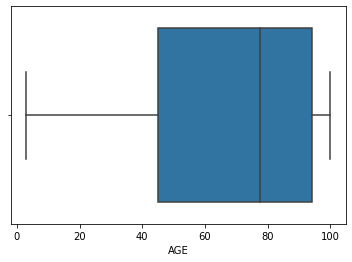

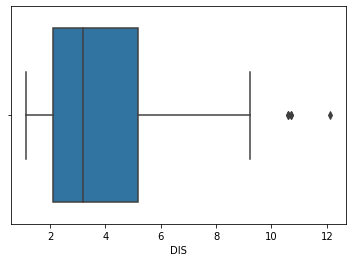

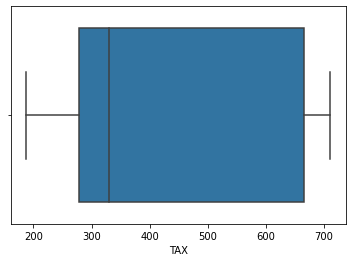

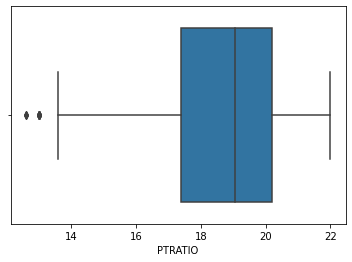

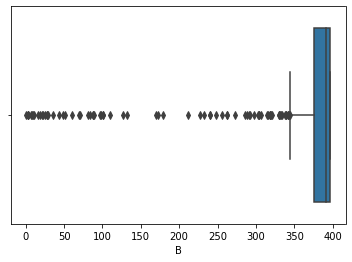

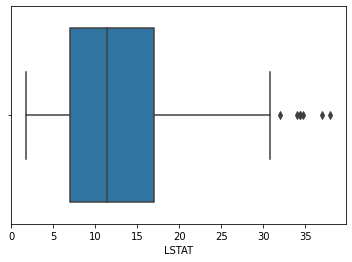

In [102]:
for i in qual_columns:
    sns.boxplot(data[i])
    plt.show()

In [13]:
cat_data = data[cat_columns]
data.drop('CHAS',axis=1, inplace=True)
data.drop('RAD',axis=1, inplace=True)
data_normalised = (data - data.mean())/data.std()

In [14]:
cat_data['RAD'].value_counts()

24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: RAD, dtype: int64

In [15]:
cat_dict_chas = {0:'a', 1:'b'}
cat_dict_rad = {7:'a', 1:'b', 8:'c', 2:'d', 6:'e', 3:'f', 4:'g', 5:'h', 24:'i'}

In [16]:
cat_data['CHAS'] = cat_data['CHAS'].map(cat_dict_chas)
cat_data['RAD'] = cat_data['RAD'].map(cat_dict_rad)
cat_data = pd.get_dummies(cat_data)

<ipython-input-16-032ed50975b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data['CHAS'] = cat_data['CHAS'].map(cat_dict_chas)
<ipython-input-16-032ed50975b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data['RAD'] = cat_data['RAD'].map(cat_dict_rad)


In [17]:
cat_data

,CHAS_a,CHAS_b,RAD_a,RAD_b,RAD_c,RAD_d,RAD_e,RAD_f,RAD_g,RAD_h,RAD_i
0,1,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
501,1,0,0,1,0,0,0,0,0,0,0
502,1,0,0,1,0,0,0,0,0,0,0
503,1,0,0,1,0,0,0,0,0,0,0
504,1,0,0,1,0,0,0,0,0,0,0


In [18]:
data = data.join(cat_data)
data_normalised = data_normalised.join(cat_data)
data

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,...,CHAS_b,RAD_a,RAD_b,RAD_c,RAD_d,RAD_e,RAD_f,RAD_g,RAD_h,RAD_i
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,...,0,0,1,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,...,0,0,0,0,1,0,0,0,0,0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,...,0,0,0,0,1,0,0,0,0,0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,...,0,0,0,0,0,0,1,0,0,0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,273.0,21.0,391.99,...,0,0,1,0,0,0,0,0,0,0
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,273.0,21.0,396.90,...,0,0,1,0,0,0,0,0,0,0
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,273.0,21.0,396.90,...,0,0,1,0,0,0,0,0,0,0
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,273.0,21.0,393.45,...,0,0,1,0,0,0,0,0,0,0


In [19]:
data_normalised

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,...,CHAS_b,RAD_a,RAD_b,RAD_c,RAD_d,RAD_e,RAD_f,RAD_g,RAD_h,RAD_i
0,-0.419367,0.284548,-1.286636,-0.144075,0.413263,-0.119895,0.140075,-0.665949,-1.457558,0.440616,...,0,0,1,0,0,0,0,0,0,0
1,-0.416927,-0.487240,-0.592794,-0.739530,0.194082,0.366803,0.556609,-0.986353,-0.302794,0.440616,...,0,0,0,0,1,0,0,0,0,0
2,-0.416929,-0.487240,-0.592794,-0.739530,1.281446,-0.265549,0.556609,-0.986353,-0.302794,0.396035,...,0,0,0,0,1,0,0,0,0,0
3,-0.416338,-0.487240,-1.305586,-0.834458,1.015298,-0.809088,1.076671,-1.105022,0.112920,0.415751,...,0,0,0,0,0,0,1,0,0,0
4,-0.412074,-0.487240,-1.305586,-0.834458,1.227362,-0.510674,1.076671,-1.105022,0.112920,0.440616,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.412820,-0.487240,0.115624,0.157968,0.438881,0.018654,-0.625178,-0.802418,1.175303,0.386834,...,0,0,1,0,0,0,0,0,0,0
502,-0.414839,-0.487240,0.115624,0.157968,-0.234316,0.288648,-0.715931,-0.802418,1.175303,0.440616,...,0,0,1,0,0,0,0,0,0,0
503,-0.413038,-0.487240,0.115624,0.157968,0.983986,0.796661,-0.772919,-0.802418,1.175303,0.440616,...,0,0,1,0,0,0,0,0,0,0
504,-0.407361,-0.487240,0.115624,0.157968,0.724955,0.736268,-0.667776,-0.802418,1.175303,0.402826,...,0,0,1,0,0,0,0,0,0,0


In [20]:
# Пока не заменяю выбросы, хочу посмотреть. 

# `Второй пункт`

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import RFE

In [22]:
train_normalised, test_normalised = train_test_split(data_normalised, test_size=.2)

In [23]:
train_normalised_target = train_normalised['MEDV']
train_normalised.drop('MEDV', axis=1, inplace=True)
test_normalised_target = test_normalised['MEDV']
test_normalised.drop('MEDV', axis=1, inplace=True)

c:\users\daniyar\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [24]:
lr_model = LinearRegression(n_jobs=-1)

In [25]:
lr_model.fit(train_normalised, train_normalised_target)
pred_target = lr_model.predict(test_normalised)
pred_target

array([-1.19582331,  1.09638142, -1.59784629,  0.86678213,  0.33633255,
        1.21482279,  1.25333318, -0.96809341, -0.37754257,  1.20758612,
        1.14955872,  1.42505334,  1.38163112, -1.01041024,  1.25844166,
        0.36273629, -1.37207448, -0.22423741, -0.4154902 , -0.49684685,
       -0.54962953,  0.37110253, -0.8259686 ,  0.01554448,  0.00595568,
        0.82495507,  0.07281255, -0.84881445,  0.28314089, -0.57095608,
       -0.15134889,  1.99004089,  0.45846038,  1.5160233 ,  0.15653321,
       -0.36424282, -0.28560866,  0.29954528, -1.12286141, -0.22192211,
       -0.32154645, -0.35124128, -0.51334711, -1.94844882, -0.83319809,
        0.49765911, -2.96770495,  0.99848632, -0.78497654, -0.38705678,
       -0.92231284, -0.28368812,  1.44392625,  0.04650406,  0.04395435,
       -0.13550206, -0.91033113,  0.3415283 ,  0.55601024,  1.45496054,
        0.89361846,  0.76192538,  1.01346065,  0.14073706, -0.16680074,
       -0.79280076, -0.45050372,  1.20855896, -0.70795555, -0.84

In [26]:
print('MAE for normalised = ', mean_absolute_error(test_normalised_target, pred_target))
print('MSE for normalised = ', mean_squared_error(test_normalised_target, pred_target))
print(lr_model.score(test_normalised,test_normalised_target))

MAE for normalised =  0.33546309500447385
MSE for normalised =  0.21939287648712258
0.7194607118887894


In [27]:
y_test = np.array(test_normalised_target)
y_pred = np.array(pred_target)

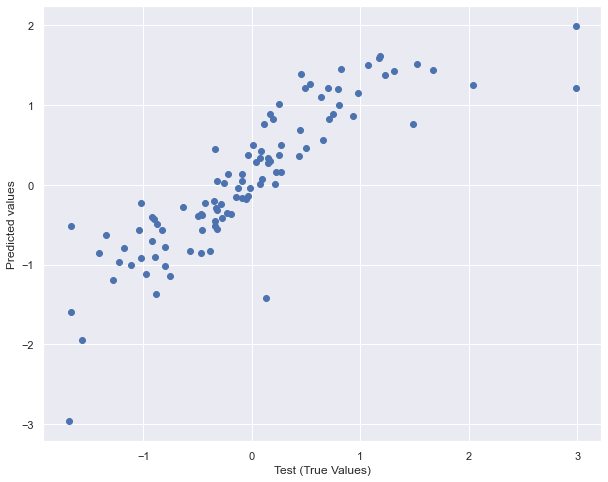

In [28]:
sns.set(rc={'figure.figsize':(10,8)})
plt.scatter(y_test, y_pred)
plt.xlabel('Test (True Values)')
plt.ylabel('Predicted values')
plt.show()

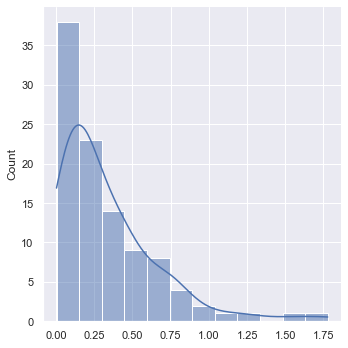

In [29]:
sns.displot(abs(y_test-y_pred), kde = True);

In [30]:
n, p = train_normalised.shape[0], train_normalised.shape[1] + 1
X_with_intercept = np.empty(shape=(n, p), dtype=float)
X_with_intercept[:, 0] = 1
X_with_intercept[:, 1:p] = train_normalised.values

In [31]:
import statsmodels.api as sm
ols = sm.OLS(train_normalised_target.values, X_with_intercept)
ols_result = ols.fit()

In [32]:
result = ols_result.summary()

Выведем конкретные признаки, чей p-value меньше 0.05

In [33]:
coeff_p_values = pd.DataFrame.from_records(result.tables[1])[4][1:].to_csv('analys.csv')
coeff_p_values = pd.read_csv('analys.csv', index_col=0)
confident_features = (coeff_p_values[1:] < 0.01).iloc[:,0]

In [34]:
confident_features.sum()

11

In [35]:
train_normalised.columns[confident_features]

Index(['CRIM', 'ZN', 'NOX', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT', 'CHAS_a',
       'RAD_b', 'RAD_i'],
      dtype='object')

In [36]:
feat_selection = RFE(lr_model)

In [37]:
fit_feat_selection = feat_selection.fit(train_normalised,train_normalised_target)
a = []
for i in range(22):
    if (fit_feat_selection.ranking_[i] == 1):
        print(train_normalised.columns[i])
        a+=[train_normalised.columns[i]]

NOX
RM
DIS
PTRATIO
LSTAT
CHAS_b
RAD_a
RAD_b
RAD_c
RAD_e
RAD_f


#### `Выводы по 2 пункту` 
Всего получается 11 значимых признаков c p-value < 0.05. Модель показывает хорошие метрики на train. Выделены самые значимые признаки модели: CRIM,INDUS,NOX

# `Третий пункт`

In [38]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_validate

In [39]:
sgd_model = SGDRegressor(random_state=7)

In [40]:
sgd_model.fit(train_normalised,train_normalised_target)

SGDRegressor(random_state=7)

In [41]:
pred_target = sgd_model.predict(test_normalised)
print('MAE for normalised = ', mean_absolute_error(test_normalised_target, pred_target))
print('MSE for normalised = ', mean_squared_error(test_normalised_target, pred_target))
print(sgd_model.score(test_normalised,test_normalised_target))

MAE for normalised =  0.31515165130685713
MSE for normalised =  0.204849720699522
0.7380571523788859


In [42]:
y_pred = np.array(pred_target)

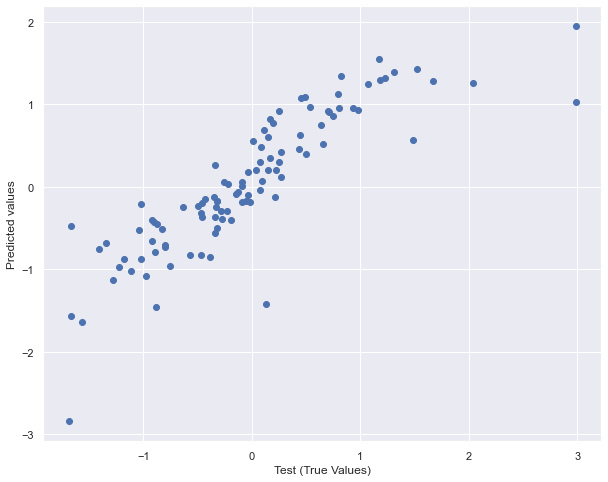

In [43]:
sns.set(rc={'figure.figsize':(10,8)})
plt.scatter(y_test, y_pred)
plt.xlabel('Test (True Values)')
plt.ylabel('Predicted values')
plt.show()

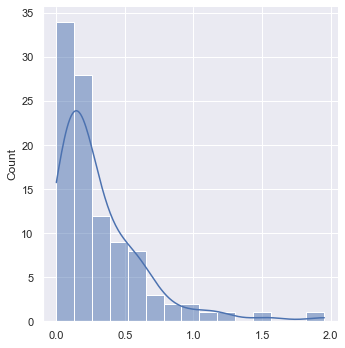

In [44]:
sns.displot(abs(y_test-y_pred), kde = True);

In [45]:
feat_selection = RFE(sgd_model)
fit_feat_selection = feat_selection.fit(train_normalised,train_normalised_target)
b = []
for i in range(22):
    if (fit_feat_selection.ranking_[i] == 1):
        print(train_normalised.columns[i])
        b+=[train_normalised.columns[i]]

ZN
NOX
RM
DIS
PTRATIO
B
LSTAT
CHAS_b
RAD_b
RAD_c
RAD_f


In [46]:
from sklearn.ensemble import GradientBoostingRegressor

In [47]:
gbr_model = GradientBoostingRegressor(random_state=7);
gbr_model.fit(train_normalised,train_normalised_target);

In [48]:
pred_target = gbr_model.predict(test_normalised)
print('MAE for normalised = ', mean_absolute_error(test_normalised_target, pred_target))
print('MSE for normalised = ', mean_squared_error(test_normalised_target, pred_target))
print(gbr_model.score(test_normalised,test_normalised_target))

MAE for normalised =  0.20169231728312825
MSE for normalised =  0.0769048691294031
0.9016611770477656


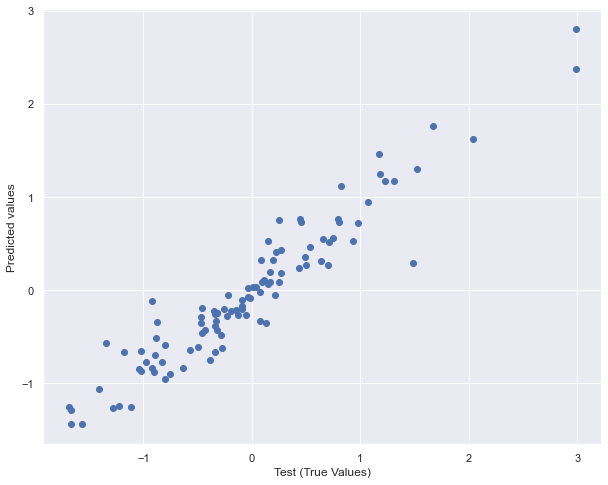

In [49]:
y_pred = np.array(pred_target)
sns.set(rc={'figure.figsize':(10,8)})
plt.scatter(y_test, y_pred)
plt.xlabel('Test (True Values)')
plt.ylabel('Predicted values')
plt.show()

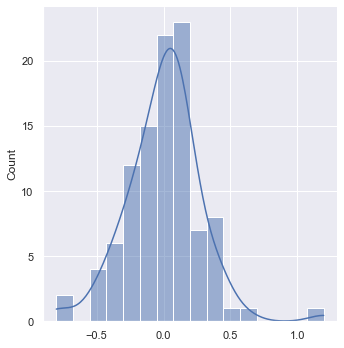

In [50]:
sns.displot((y_test-y_pred), kde = True);

In [51]:
feat_selection = RFE(gbr_model)
fit_feat_selection = feat_selection.fit(train_normalised,train_normalised_target)
c = []
for i in range(22):
    if (fit_feat_selection.ranking_[i] == 1):
        print(train_normalised.columns[i])
        c+=[train_normalised.columns[i]]

CRIM
INDUS
NOX
RM
AGE
DIS
TAX
PTRATIO
B
LSTAT
RAD_b


#### Сравним линейную регрессию и градиентный бустинг на кросс-валидации

In [52]:
gbr_cv = cross_validate(gbr_model, train_normalised, y=train_normalised_target,
                        cv=5,scoring=['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'])

In [53]:
lr_cv = cross_validate(lr_model, train_normalised, y=train_normalised_target,
                        cv=5,scoring=['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'])

In [54]:
result_gbr = pd.DataFrame(gbr_cv)
result_gbr

,fit_time,score_time,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_r2
0,0.090277,0.062498,-0.286411,-0.241353,0.812271
1,0.102814,0.002400,-0.268069,-0.144274,0.847001
2,0.086180,0.000000,-0.194485,-0.057456,0.938870
3,0.086836,0.000000,-0.306688,-0.163503,0.865089
4,0.082362,0.000000,-0.264023,-0.197019,0.766087


In [55]:
result_gbr['test_r2'].mean()

0.8458634627092962

In [56]:
result_lr = pd.DataFrame(lr_cv)
result_lr

,fit_time,score_time,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_r2
0,0.012783,0.006001,-0.425741,-0.472820,0.632231
1,0.003997,0.004000,-0.412345,-0.320652,0.659957
2,0.007001,0.004001,-0.331718,-0.198589,0.788713
3,0.004998,0.003000,-0.411420,-0.294209,0.757240
4,0.001999,0.002000,-0.377748,-0.225013,0.732850


In [57]:
result_lr['test_r2'].mean()

0.7141980309461727

#### `Выводу по 3 пункту:`
1. была обучена модель градиентного бустинга 
2. на кросс-валидации на 5 фолдах модель градиентного бустинга ожидаемо показала лучшие значения по сравнению с моделью линейной регрсесии 

# `Четвертый пункт`

In [58]:
def plot_points(x,y1,y2,y_true, feat):
    plt.scatter(x,y1, label = 'Linear_model')
    plt.scatter(x,y2, label = 'GBR')
    plt.scatter(x,y_true, label='True values')
    plt.title(feat)
    plt.legend()
    plt.show()

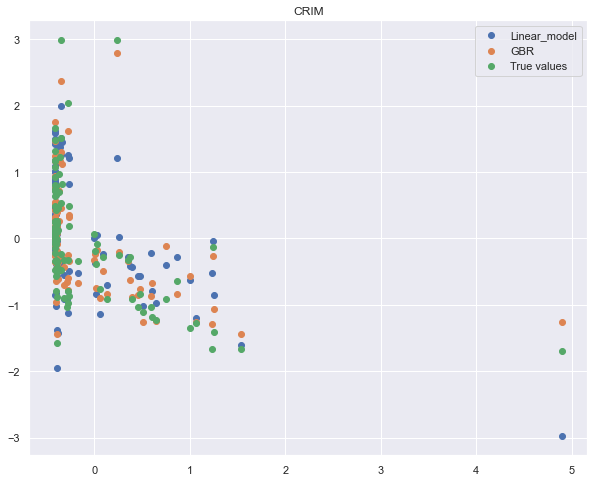

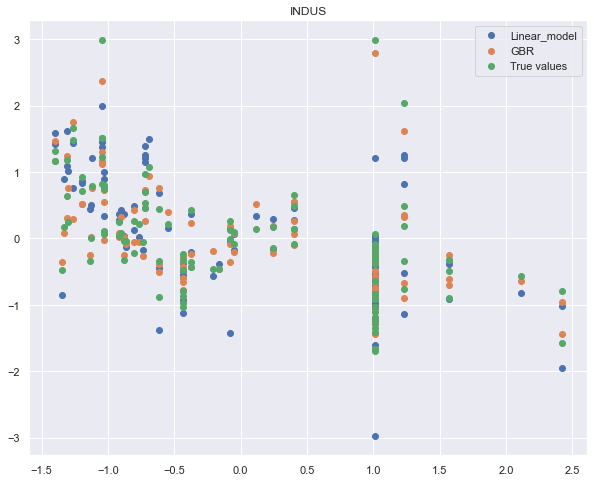

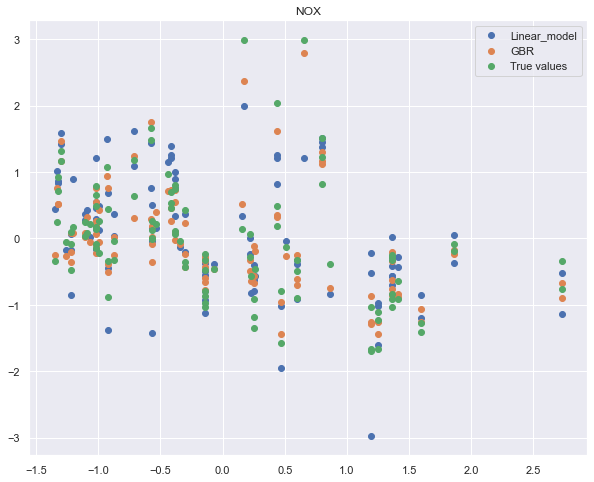

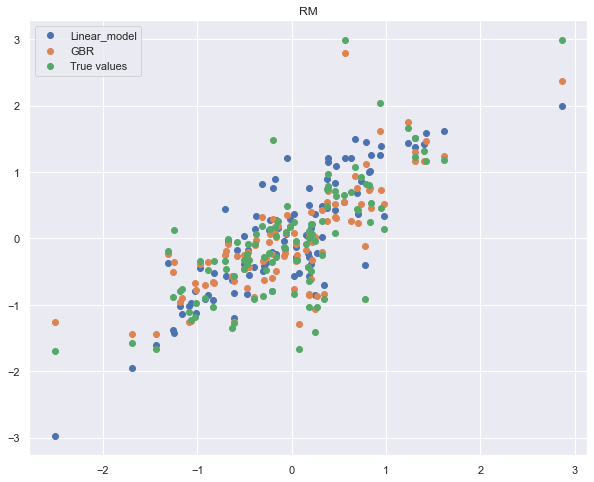

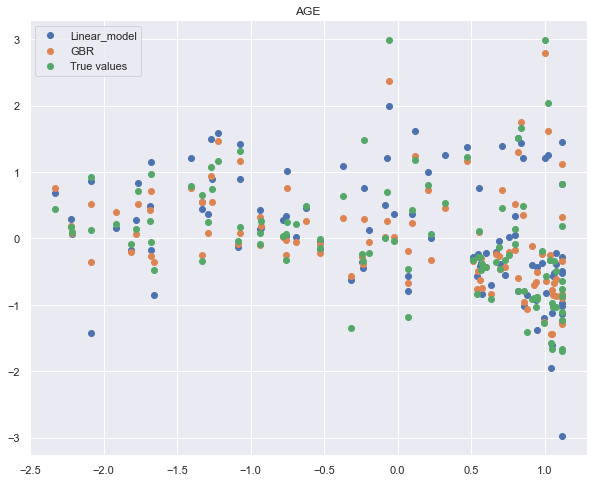

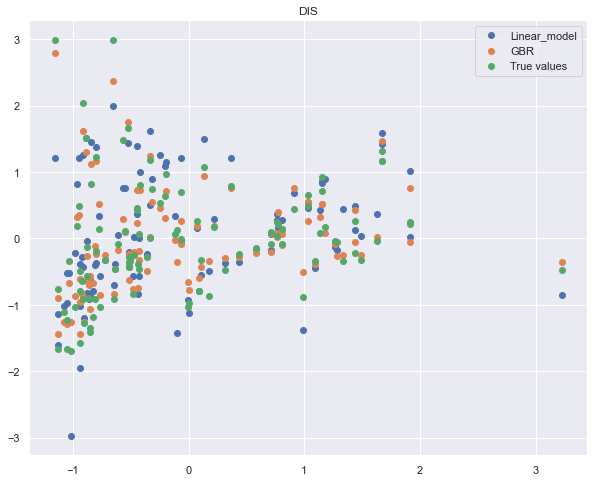

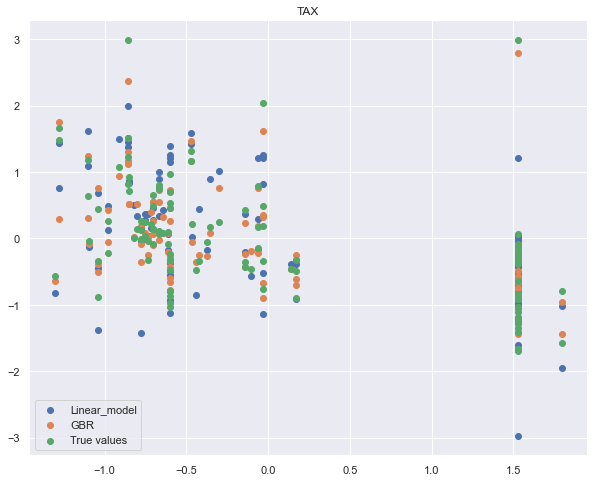

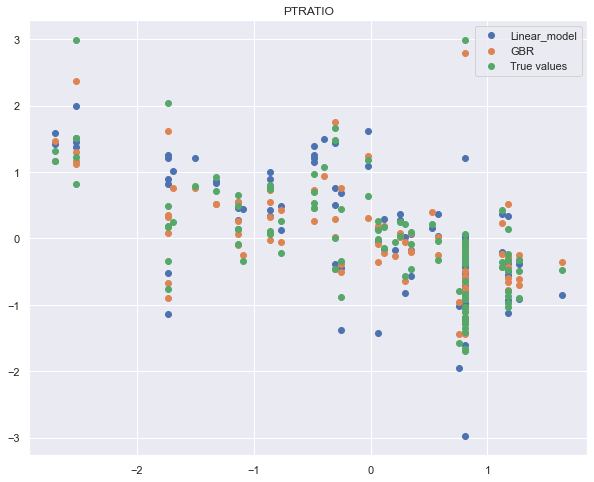

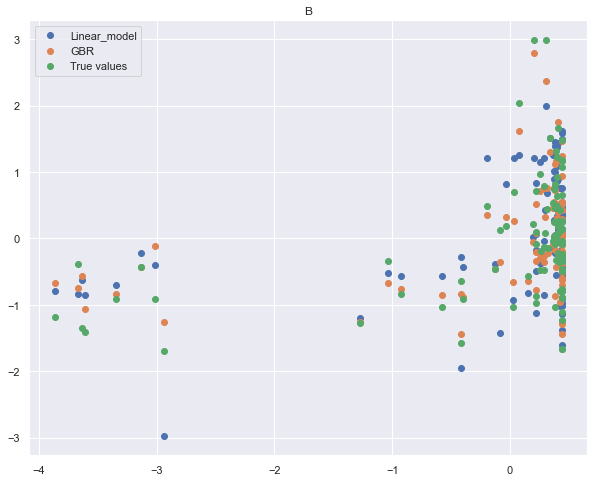

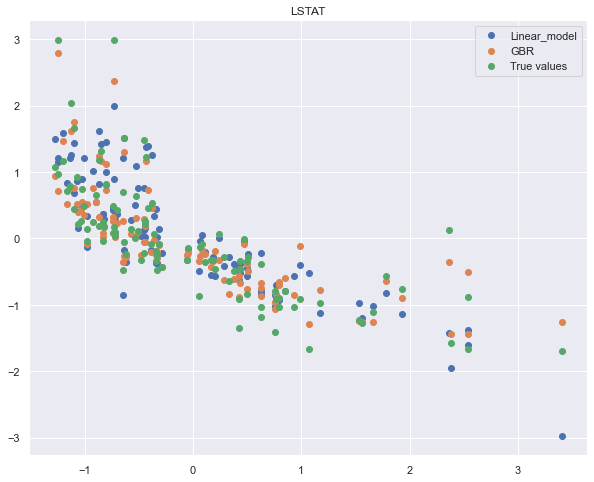

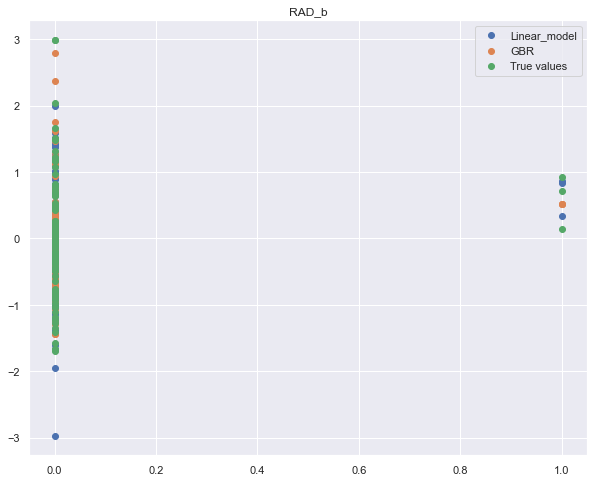

In [59]:
y1 = np.array(lr_model.predict(test_normalised))
y2 = np.array(gbr_model.predict(test_normalised))
y_true = y_test
for feat in c:
    x = np.array(test_normalised[feat])
    plot_points(x,y1,y2,y_true, feat)

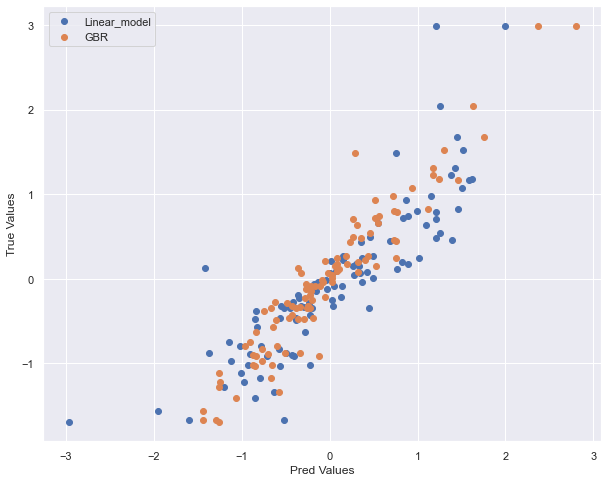

In [60]:
plt.scatter(y1,y_true,label='Linear_model')
plt.scatter(y2,y_true, label='GBR')
plt.xlabel('Pred Values')
plt.ylabel('True Values')
plt.legend()
plt.show()

### Ожидаемо показатели градиентного бустинга лучше линейной регрессии